In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('..\Initial_data\K5P23\K5P23_cor.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_6072\3259552578.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P23\K5P23_cor.csv', ";")


K0P125.PV  K5Q2_2.PV  K5FCV4_2I.PV   K5P6.PV  K5PCV6I.PV  K5PCV17_1I.PV  \
0     67.44596   494.0474      9.330159  1.653008    95.01530       70.45521   
1     66.87718   506.2909      9.489755  1.680137    95.56659       70.74840   
2     66.75259  1034.6810      6.942690  1.681726    95.65205       71.29128   
3     66.65165  1634.3180      9.949176  1.680142    95.75198       71.19357   
4     66.53733  3242.3850      6.283673  1.680123    95.80904       71.31487   
..         ...        ...           ...       ...         ...            ...   
124   68.19244   352.5026      5.466286  0.670175    94.87848       70.88206   
125   68.22311   370.7700      5.720784  0.672425    95.09186       71.01438   
126   68.87460   325.4563      9.966478  0.646166    95.52306       70.69131   
127   68.73576   247.8441      9.911775  0.661758    95.13222       70.55723   
128   68.95270   328.4229      9.958347  0.620163    95.53967       70.65926   

     K5P17_1.PV  K5PCV17_2I.PV  K5P17_2.PV   K5F3.PV  ...  K5P18_2.PV  \
0     10.317210       98.21707   10.096680  2977.827  ...   -84.34444   
1     10.316650       98.50018   10.095040  2927.134  ...   -83.30565   
2     10.396300       98.71431   10.159540  2900.535  ...   -80.85193   
3     10.282540       98.86819   10.056530  2890.979  ...   -81.47894   
4     10.291150       98.72354   10.059570  2885.439  ...   -80.22286   
..          ...            ...         ...       ...  ...         ...   
124    4.921059       98.32474    4.795014  1977.031  ...   -68.80238   
125    4.939093       98.45263    4.807625  1973.890  ...   -68.05803   
126    4.888418       98.41850    4.764278  1971.471  ...   -68.44057   
127    4.797123       98.35905    4.663934  1944.042  ...   -69.23579   
128    4.653776       98.40217    4.534199  1921.048  ...   -67.85905   

     K5P23.PV  K5P24.PV  K5P20.PV  K5T5_1.PV  K5T5_2.PV  K5T18_1.PV  \
0    1.298635  1.424265 -724.3501   614.5725   748.4112    248.8402   
1    1.315201  1.443824 -724.7084   610.7068   741.5828    248.9852   
2    1.285830  1.444966 -725.3846   607.5529   737.7582    248.1174   
3    1.294286  1.443027 -725.3129   607.7937   737.0858    248.4443   
4    1.288446  1.443438 -725.4376   606.9885   735.4639    247.8035   
..        ...       ...       ...        ...        ...         ...   
124  0.507902  0.574975 -839.7950   562.1282   648.2133    202.7271   
125  0.505261  0.575616 -838.7809   560.1978   647.1981    203.8302   
126  0.493084  0.555330 -840.9062   559.7174   647.0200    200.7711   
127  0.508799  0.569326 -839.2973   557.9197   644.5317    201.3916   
128  0.473790  0.532216 -844.0361   555.1661   641.0065    199.5653   

     K5T8_4.PV  K5T8_5.PV  K5T8_6.PV  
0    104.83760  113.14160   164.9000  
1    107.35540  115.38960   166.7137  
2    109.34810  117.13710   167.3322  
3    109.89130  117.58730   167.7440  
4    110.68530  118.20740   167.9377  
..         ...        ...        ...  
124   93.21183   97.39230   140.6240  
125   93.18359   97.34921   140.9064  
126   91.07391   94.88878   138.5038  
127   90.42651   93.93913   138.3448  
128   90.92519   94.66339   138.0215  

[129 rows x 52 columns]

<AxesSubplot:>

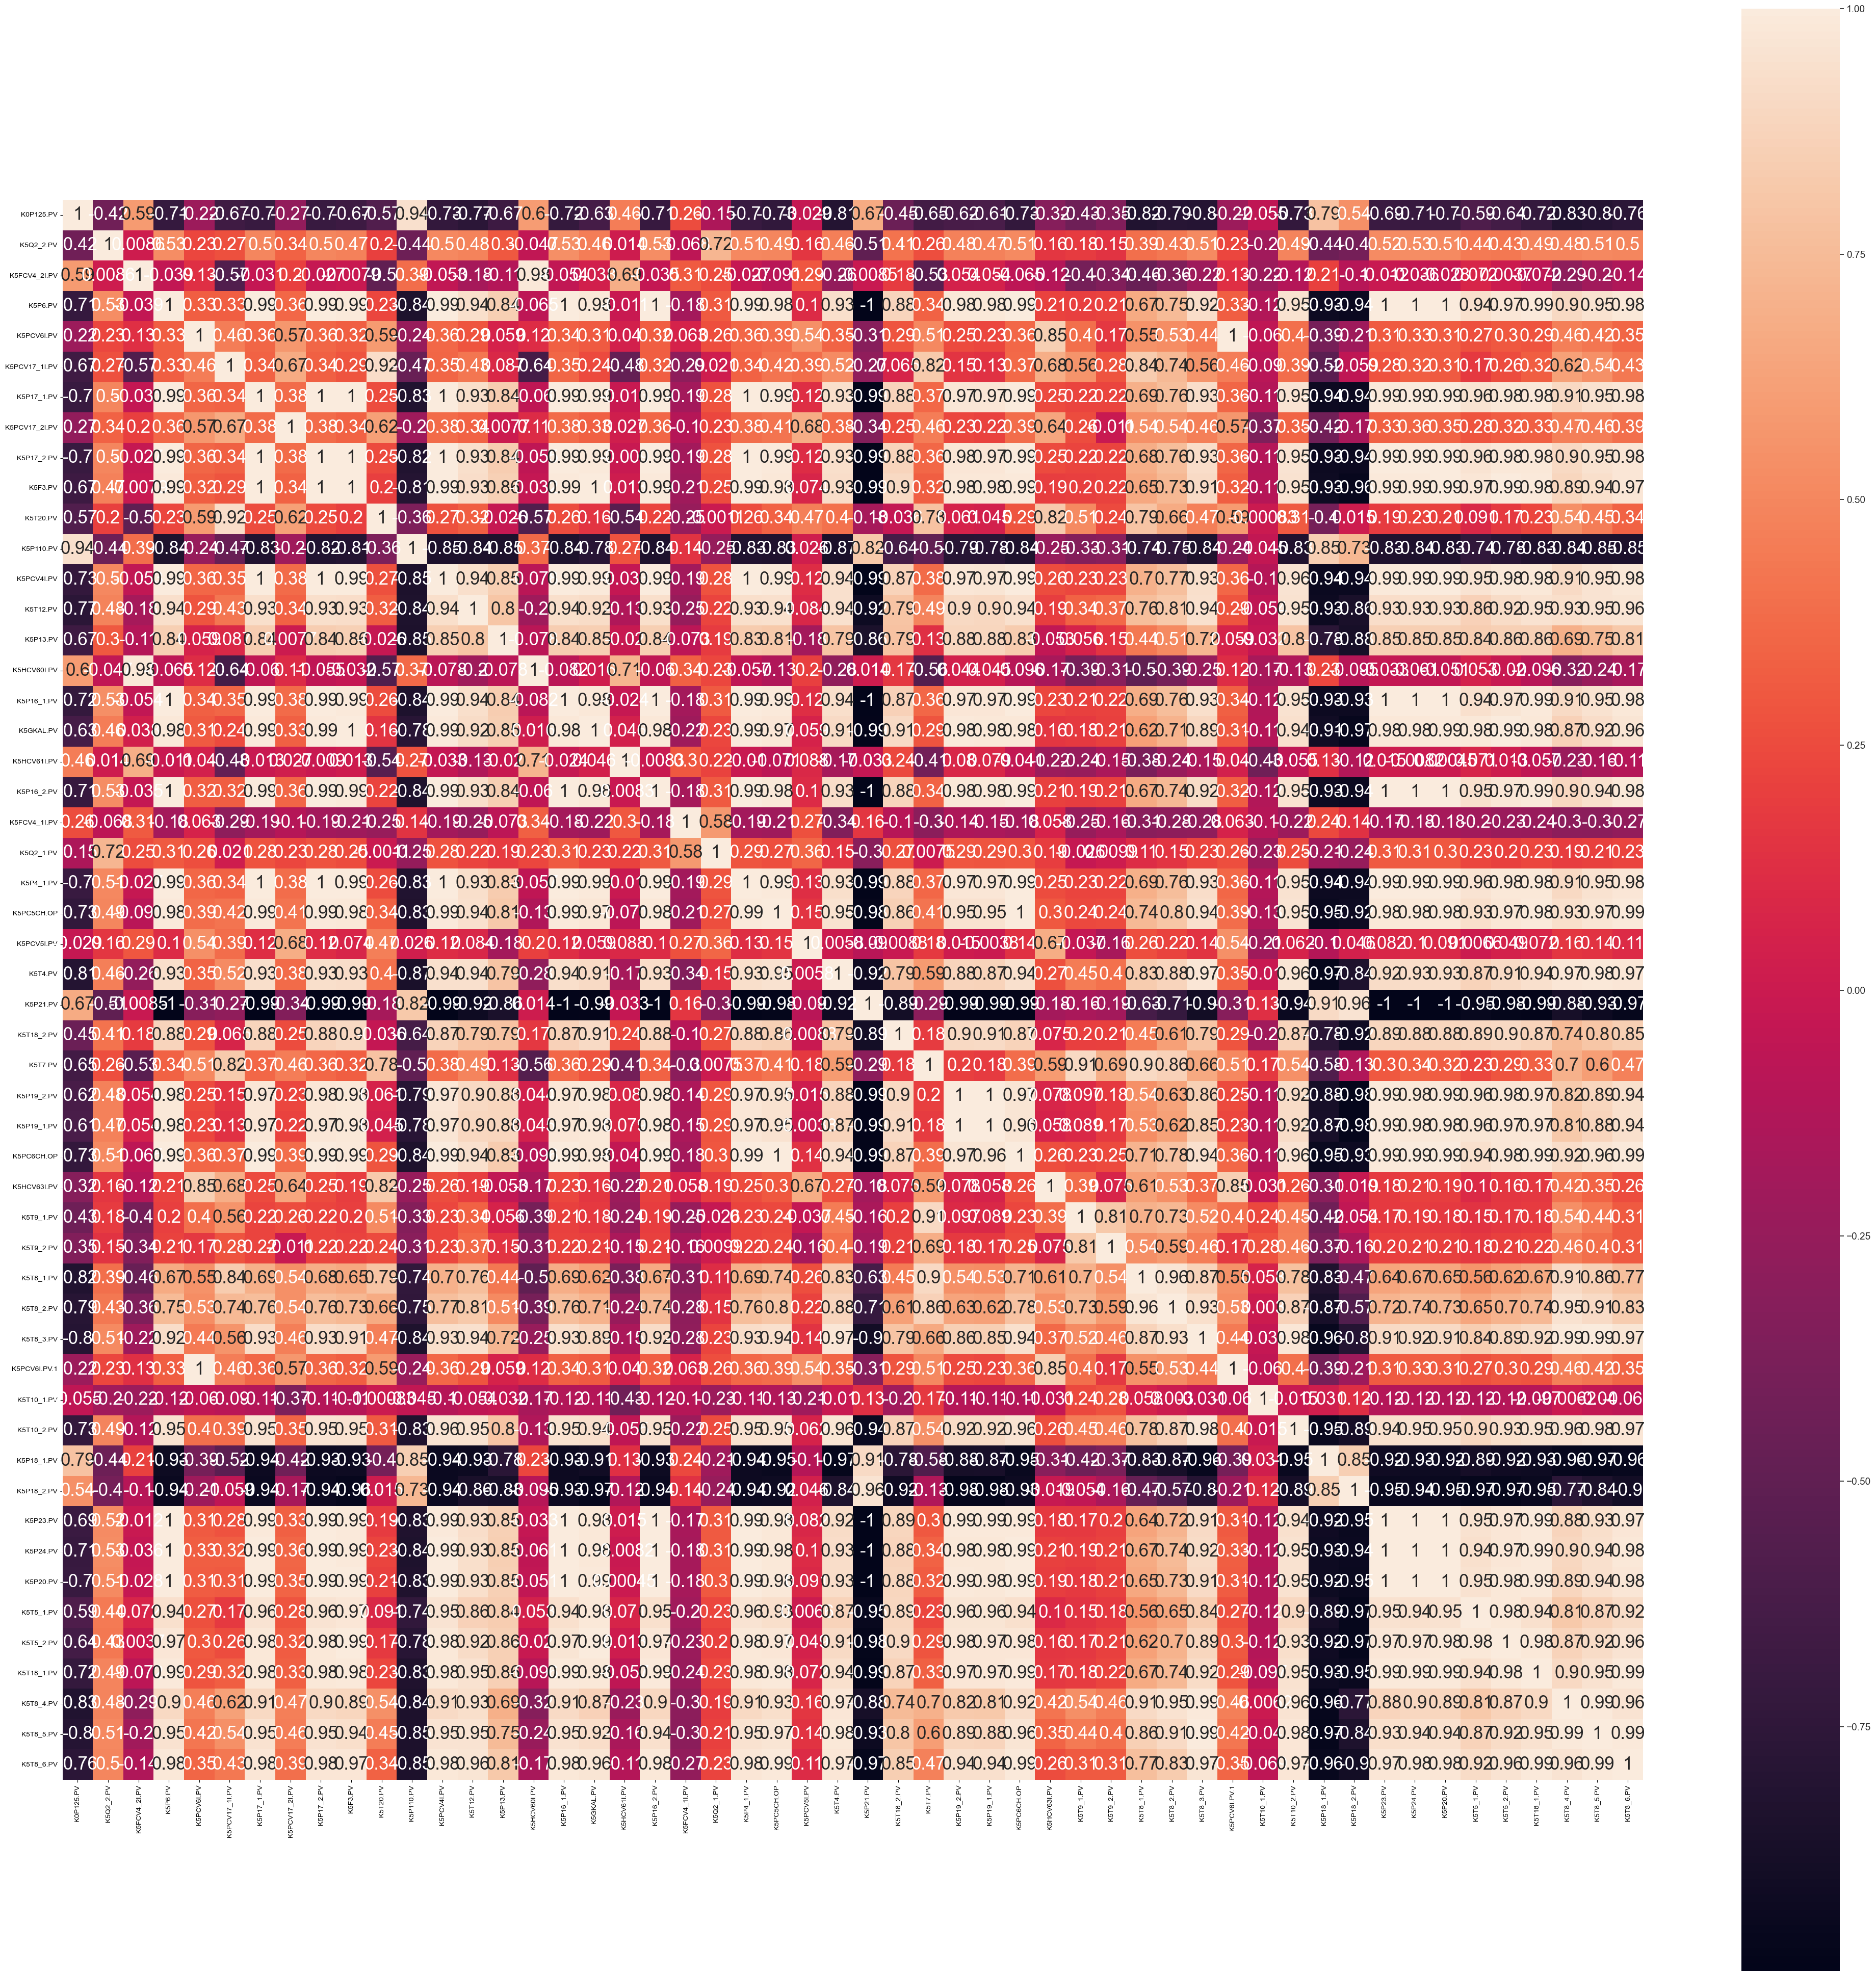

In [4]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [5]:
df = pd.read_csv('..\Initial_data\K5P23\K5P23.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_6072\1593204782.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P23\K5P23.csv', ";")


K5P6.PV  K5PCV6I.PV  K5PC6CH.OP  K5P23.PV
0    1.653008    95.01530    62.29572  1.298635
1    1.680137    95.56659    63.50603  1.315201
2    1.681726    95.65205    64.08926  1.285830
3    1.680142    95.75198    63.97196  1.294286
4    1.680123    95.80904    64.30648  1.288446
..        ...         ...         ...       ...
124  0.670175    94.87848    39.18575  0.507902
125  0.672425    95.09186    39.24564  0.505261
126  0.646166    95.52306    38.45308  0.493084
127  0.661758    95.13222    39.51466  0.508799
128  0.620163    95.53967    37.74855  0.473790

[129 rows x 4 columns]

In [6]:
df=df.dropna()
df=df.round(3)
df

K5P6.PV  K5PCV6I.PV  K5PC6CH.OP  K5P23.PV
0      1.653      95.015      62.296     1.299
1      1.680      95.567      63.506     1.315
2      1.682      95.652      64.089     1.286
3      1.680      95.752      63.972     1.294
4      1.680      95.809      64.306     1.288
..       ...         ...         ...       ...
124    0.670      94.878      39.186     0.508
125    0.672      95.092      39.246     0.505
126    0.646      95.523      38.453     0.493
127    0.662      95.132      39.515     0.509
128    0.620      95.540      37.749     0.474

[129 rows x 4 columns]

In [7]:
y = df.drop(['K5P6.PV', 'K5PCV6I.PV', 'K5PC6CH.OP'], axis=1)
x = df.drop(['K5P23.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

In [9]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
clf.score(X_test, y_test)

0.989511598905216

In [11]:
import pickle
filename = '../model/K5P23.sav'
pickle.dump(clf, open(filename, 'wb'))

In [12]:
loaded_model = pickle.load(open("../model/K5P23.sav", 'rb'))

In [13]:
task2 = {'K5P6.PV':[0.62], 
        'K5PCV6I.PV':[95], 
        'K5PC6CH.OP':[37.7]}
df2 = pd.DataFrame(data=task2)
df2

K5P6.PV  K5PCV6I.PV  K5PC6CH.OP
0     0.62          95        37.7

In [14]:
loaded_model.predict(df2)

array([[0.44802898]])